# Reproducibility with original data (DLPFC)

This tutorial demonstrates how to pseudo-spatiotemporal analysis on 10X Visium human dorsolateral prefrontal cortex data using SODB and SpaceFlow.

A reference paper can be found at https://www.nature.com/articles/s41467-022-31739-w.

This tutorial refers to the following tutorial at https://github.com/hongleir/SpaceFlow/blob/master/tutorials/seqfish_mouse_embryogenesis.ipynb. At the same time, the way of loadding data is modified by using SODB.

## Import packages and set configurations

In [ ]:
# Use the Python warnings module to filter and ignore any warnings that may occur in the program after this point.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import several python packages commonly used in data analysis and visualization.
# numpy (imported as np) is a package for numerical computing with arrays.
import numpy as np
# scanpy (imported as sc) is a package for single-cell RNA sequencing analysis.
import scanpy as sc
# matplotlib.pyplot (imported as plt) is a package for data visualization.
import matplotlib.pyplot as plt

In [ ]:
# from SpaceFlow package import SpaceFlow module
from SpaceFlow import SpaceFlow

In [ ]:
# Imports a palettable package
import palettable
# Create three variables with lists of colors for categorical visualizations and biotechnology-related visualizations, respectively.
cmp_pspace = palettable.cartocolors.diverging.TealRose_7.mpl_colormap
cmp_domain = palettable.cartocolors.qualitative.Pastel_10.mpl_colors
cmp_ct = palettable.cartocolors.qualitative.Safe_10.mpl_colors

## Streamline development of loading spatial data with SOBD

In [2]:
# Import pysodb package
# Pysodb is a Python package that provides a set of tools for working with SODB databases. 
# SODB is a format used to store data in memory-mapped files for efficient access and querying. 
# This package allows users to interact with SODB files using Python.
import pysodb

In [3]:
# Initialize the sodb object
sodb = pysodb.SODB()

In [6]:
# Define names of the dataset_name and experiment_name
dataset_name = 'maynard2021trans'
experiment_name = '151671'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
#%%time
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[151671] in dataset[maynard2021trans]
CPU times: user 75.9 ms, sys: 63.8 ms, total: 140 ms
Wall time: 139 ms


## Perform SpaceFlow for pseudo-spatiotemporal analysis

In [8]:
# Create SpaceFlow Object
#%%time
sf = SpaceFlow.SpaceFlow(
    count_matrix=adata.X, 
    spatial_locs=adata.obsm['spatial'], 
    sample_names=adata.obs_names, 
    gene_names=adata.var_names
)

CPU times: user 109 ms, sys: 30 ms, total: 139 ms
Wall time: 137 ms


In [9]:
adata

AnnData object with n_obs × n_vars = 4110 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [10]:
# Preprocess data
#%%time
sf.preprocessing_data(n_top_genes=3000)

CPU times: user 8.33 s, sys: 27 s, total: 35.4 s
Wall time: 1.28 s


In [12]:
# Train a deep graph network model
#%%time
sf.train(
    spatial_regularization_strength=0.1, 
    z_dim=50, 
    lr=1e-3, 
    epochs=1000, 
    max_patience=50, 
    min_stop=100, 
    random_seed=42, 
    gpu=0, 
    regularization_acceleration=True, 
    edge_subset_sz=1000000
)

Epoch 2/1000, Loss: 1.6001609563827515
Epoch 12/1000, Loss: 1.4461253881454468
Epoch 22/1000, Loss: 1.4314897060394287
Epoch 32/1000, Loss: 1.4026073217391968
Epoch 42/1000, Loss: 1.3405781984329224
Epoch 52/1000, Loss: 1.2011524438858032
Epoch 62/1000, Loss: 0.9267825484275818
Epoch 72/1000, Loss: 0.6077714562416077
Epoch 82/1000, Loss: 0.39362195134162903
Epoch 92/1000, Loss: 0.2511689364910126
Epoch 102/1000, Loss: 0.16698984801769257
Epoch 112/1000, Loss: 0.12829257547855377
Epoch 122/1000, Loss: 0.10666249692440033
Epoch 132/1000, Loss: 0.08678406476974487
Epoch 142/1000, Loss: 0.08299049735069275
Epoch 152/1000, Loss: 0.07998204231262207
Epoch 162/1000, Loss: 0.07233261317014694
Epoch 172/1000, Loss: 0.07052020728588104
Epoch 182/1000, Loss: 0.06629030406475067
Epoch 192/1000, Loss: 0.06269742548465729
Epoch 202/1000, Loss: 0.06562982499599457
Epoch 212/1000, Loss: 0.059452757239341736
Epoch 222/1000, Loss: 0.06327913701534271
Epoch 232/1000, Loss: 0.0545060969889164
Epoch 242/10

array([[ 1.9015639e+00,  2.7565975e+00,  3.0736020e-01, ...,
         5.4860169e-01, -3.8750693e-01, -8.8214676e-04],
       [ 2.2538874e+00,  1.8622274e+00, -3.8126372e-02, ...,
         1.0679485e+00, -3.9332184e-01,  1.5848362e+00],
       [ 1.9933287e+00,  2.0335426e+00, -7.4711582e-03, ...,
        -2.6162710e-02, -4.7248432e-01, -7.9308771e-02],
       ...,
       [ 1.9582258e+00,  2.6042442e+00, -3.2896616e-02, ...,
         8.3228642e-01, -3.8532552e-01,  1.2829448e+00],
       [ 1.8998536e+00,  2.0076265e+00,  1.4463634e+00, ...,
        -1.8578103e-02, -5.1640099e-01,  1.5888160e-01],
       [ 1.4707444e+00,  1.8670331e+00, -5.9792470e-02, ...,
        -6.9792736e-03, -3.3742413e-01, -1.2368531e-02]], dtype=float32)

In [13]:
# Idenfify the spatiotemporal patterns through pseudo-Spatiotemporal Map (pSM)
sf.pseudo_Spatiotemporal_Map(pSM_values_save_filepath="./pSM_values.tsv", n_neighbors=20, resolution=1.0)

Performing pseudo-Spatiotemporal Map
pseudo-Spatiotemporal Map(pSM) calculation complete, pSM values of cells or spots saved at ./pSM_values.tsv!


In [14]:
# Create a new column called 'pspace' from pSM values of cells or spots.
adata.obs['pspace'] = sf.pSM_values

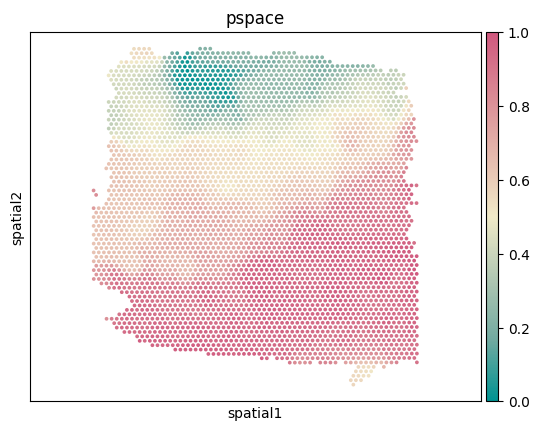

In [15]:
# Visualize spatial coordinates in a scatterplot colored by pspace
ax = sc.pl.embedding(adata,basis='spatial',color='pspace',show=False,color_map=cmp_pspace)
ax.axis('equal')
plt.savefig('figures/DLPFC_pspace.png',bbox_inches='tight',transparent=True,dpi=400)
plt.savefig('figures/DLPFC_pspace.pdf',bbox_inches='tight',transparent=True,dpi=400)



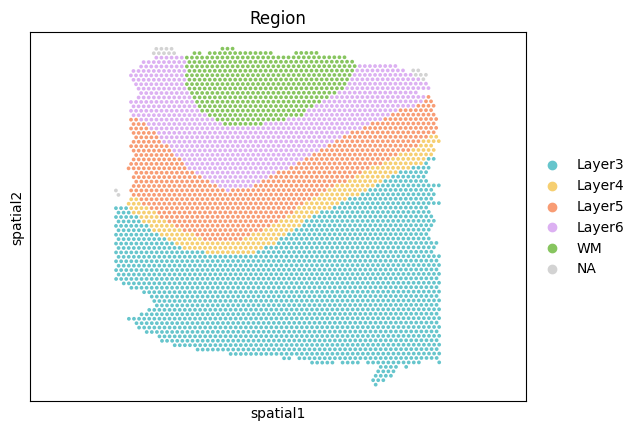

In [16]:
# Visualize spatial coordinates in a scatterplot colored by Region
ax = sc.pl.embedding(adata,basis='spatial',color='Region',show=False,palette=cmp_domain)
ax.axis('equal')
plt.savefig('figures/seqFISH_ct.png',bbox_inches='tight',transparent=True,dpi=400)
plt.savefig('figures/seqFISH_ct.pdf',bbox_inches='tight',transparent=True,dpi=400)

